In [ ]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Assume 'target' is the label column
X = df.drop(columns=['Species','Id'])
y=df['Species']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=15)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Predict the test set results
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.93
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30



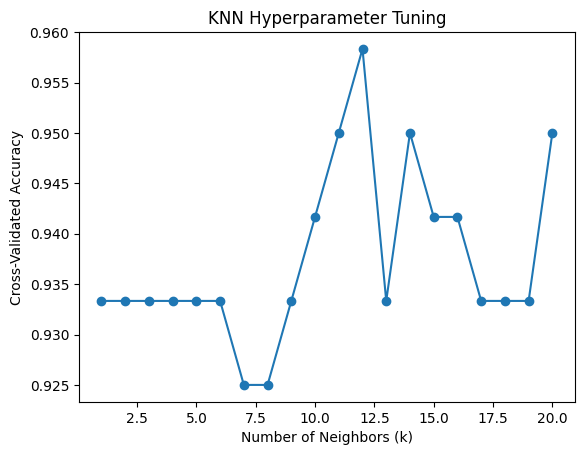

Best k value: 12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Try different values of k
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accuracy_scores.append(scores.mean())

# Plot the accuracy vs k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

# Best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")


TAKING K=12

In [ ]:
# Initialize KNN model with k=12
knn12= KNeighborsClassifier(n_neighbors=12)

# Train the model
knn12.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Predict the test set results
y_pred12 = knn12.predict(X_test)

# Evaluate the model
accuracy12 = accuracy_score(y_test, y_pred12)
print(f"KNN Accuracy: {accuracy12:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred12))

KNN Accuracy: 0.97
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Train with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict again
y_pred_best = knn_best.predict(X_test)

# Evaluate new model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized KNN Accuracy: {accuracy_best:.2f}")


Optimized KNN Accuracy: 0.97


In [ ]:
# Predict on the test set
y_pred = knn_best.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.9666666666666667

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [ ]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Example data for a Setosa flower

# Scale the new sample using the same scaler
new_sample_scaled = scaler.transform(new_sample)

# Predict the class for the new sample
new_sample_prediction = knn_best.predict(new_sample_scaled)

# Output the predicted class
print(f"Predicted Class for the new sample: {new_sample_prediction[0]}")



Predicted Class for the new sample: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid = {'n_neighbors': range(1, 21)}

# Initialize KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to search for the best hyperparameter k
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best k: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best k: {'n_neighbors': 12}
Best score: 0.9583333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Train LogisticRegression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Evaluate both models
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred):.2f}")
print(f"Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print(f"Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(f"Logistic Regression Classification Report:\n", classification_report(y_test, logreg_pred))
print(f"Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))



Random Forest Accuracy: 0.97
Logistic Regression Accuracy: 0.93
Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Random Forest Confusion Matrix:
 [[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93  